Setup

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

df = pd.read_csv("./output/merged_dataset_method1_undersampled.csv")
print(df.shape)

(91933, 71)


Column filtering

In [ ]:
# df = df.get(["attack_type", "cpu_total", "class", "flow_duration", "flow_byts_s", "flow_pkts_s", "tot_fwd_pkts", "totlen_fwd_pkts"])
# print(df.shape)
# df.head()

(91933, 70)
Index(['class', 'dst_port', 'protocol', 'timestamp', 'flow_duration',
       'flow_byts_s', 'flow_pkts_s', 'fwd_pkts_s', 'bwd_pkts_s',
       'tot_fwd_pkts', 'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts',
       'fwd_pkt_len_max', 'fwd_pkt_len_min', 'fwd_pkt_len_mean',
       'fwd_pkt_len_std', 'bwd_pkt_len_max', 'bwd_pkt_len_min',
       'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min',
       'pkt_len_mean', 'pkt_len_std', 'pkt_len_var', 'fwd_header_len',
       'bwd_header_len', 'fwd_seg_size_min', 'fwd_act_data_pkts',
       'flow_iat_mean', 'flow_iat_max', 'flow_iat_min', 'flow_iat_std',
       'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean',
       'fwd_iat_std', 'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min',
       'bwd_iat_mean', 'bwd_iat_std', 'fin_flag_cnt', 'down_up_ratio',
       'pkt_size_avg', 'init_fwd_win_byts', 'init_bwd_win_byts', 'active_max',
       'active_min', 'active_mean', 'active_std', 'idle_max', 'idle_min',
   

<Axes: >

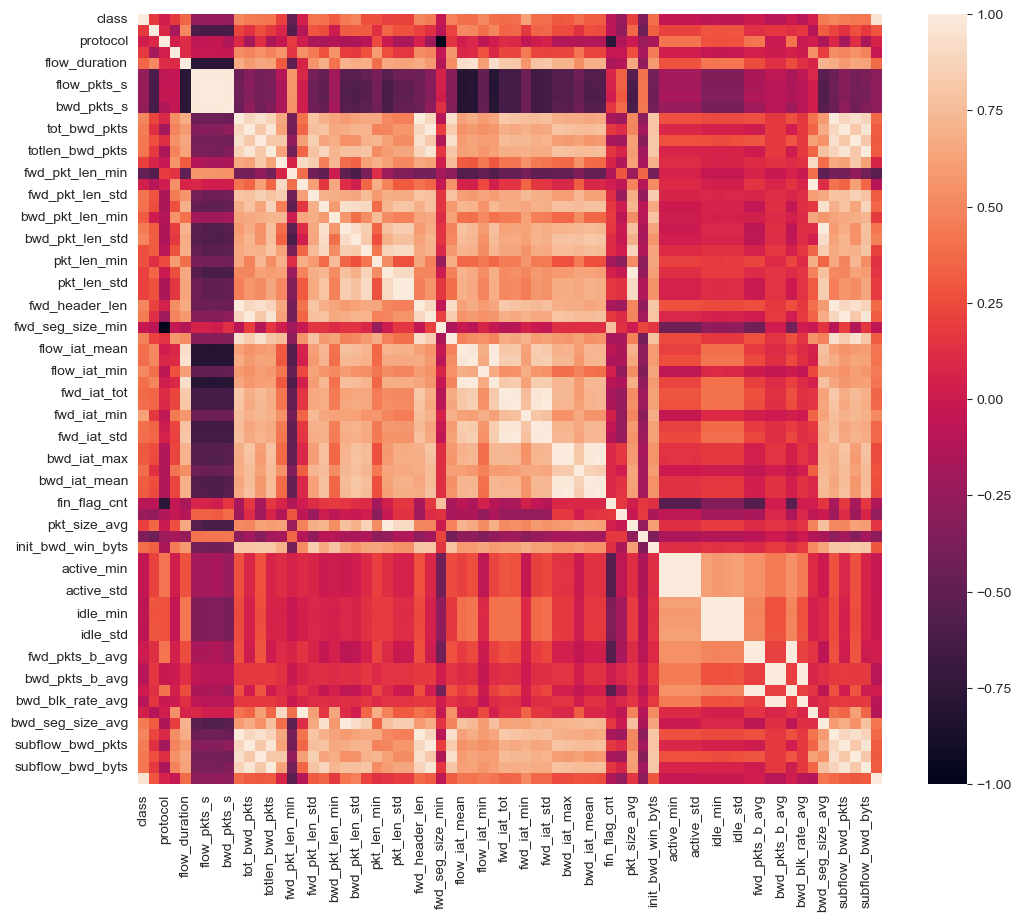

In [22]:
plt.figure(figsize=(12, 10))
corr_df= df
corr_df= corr_df.drop(['cpu'], axis=1)
r = corr_df.corr(method='spearman')
print(corr_df.shape)
print(corr_df.columns)
print(r.shape)
sns.heatmap(r, vmin=-1, vmax=1)

(70, 70)


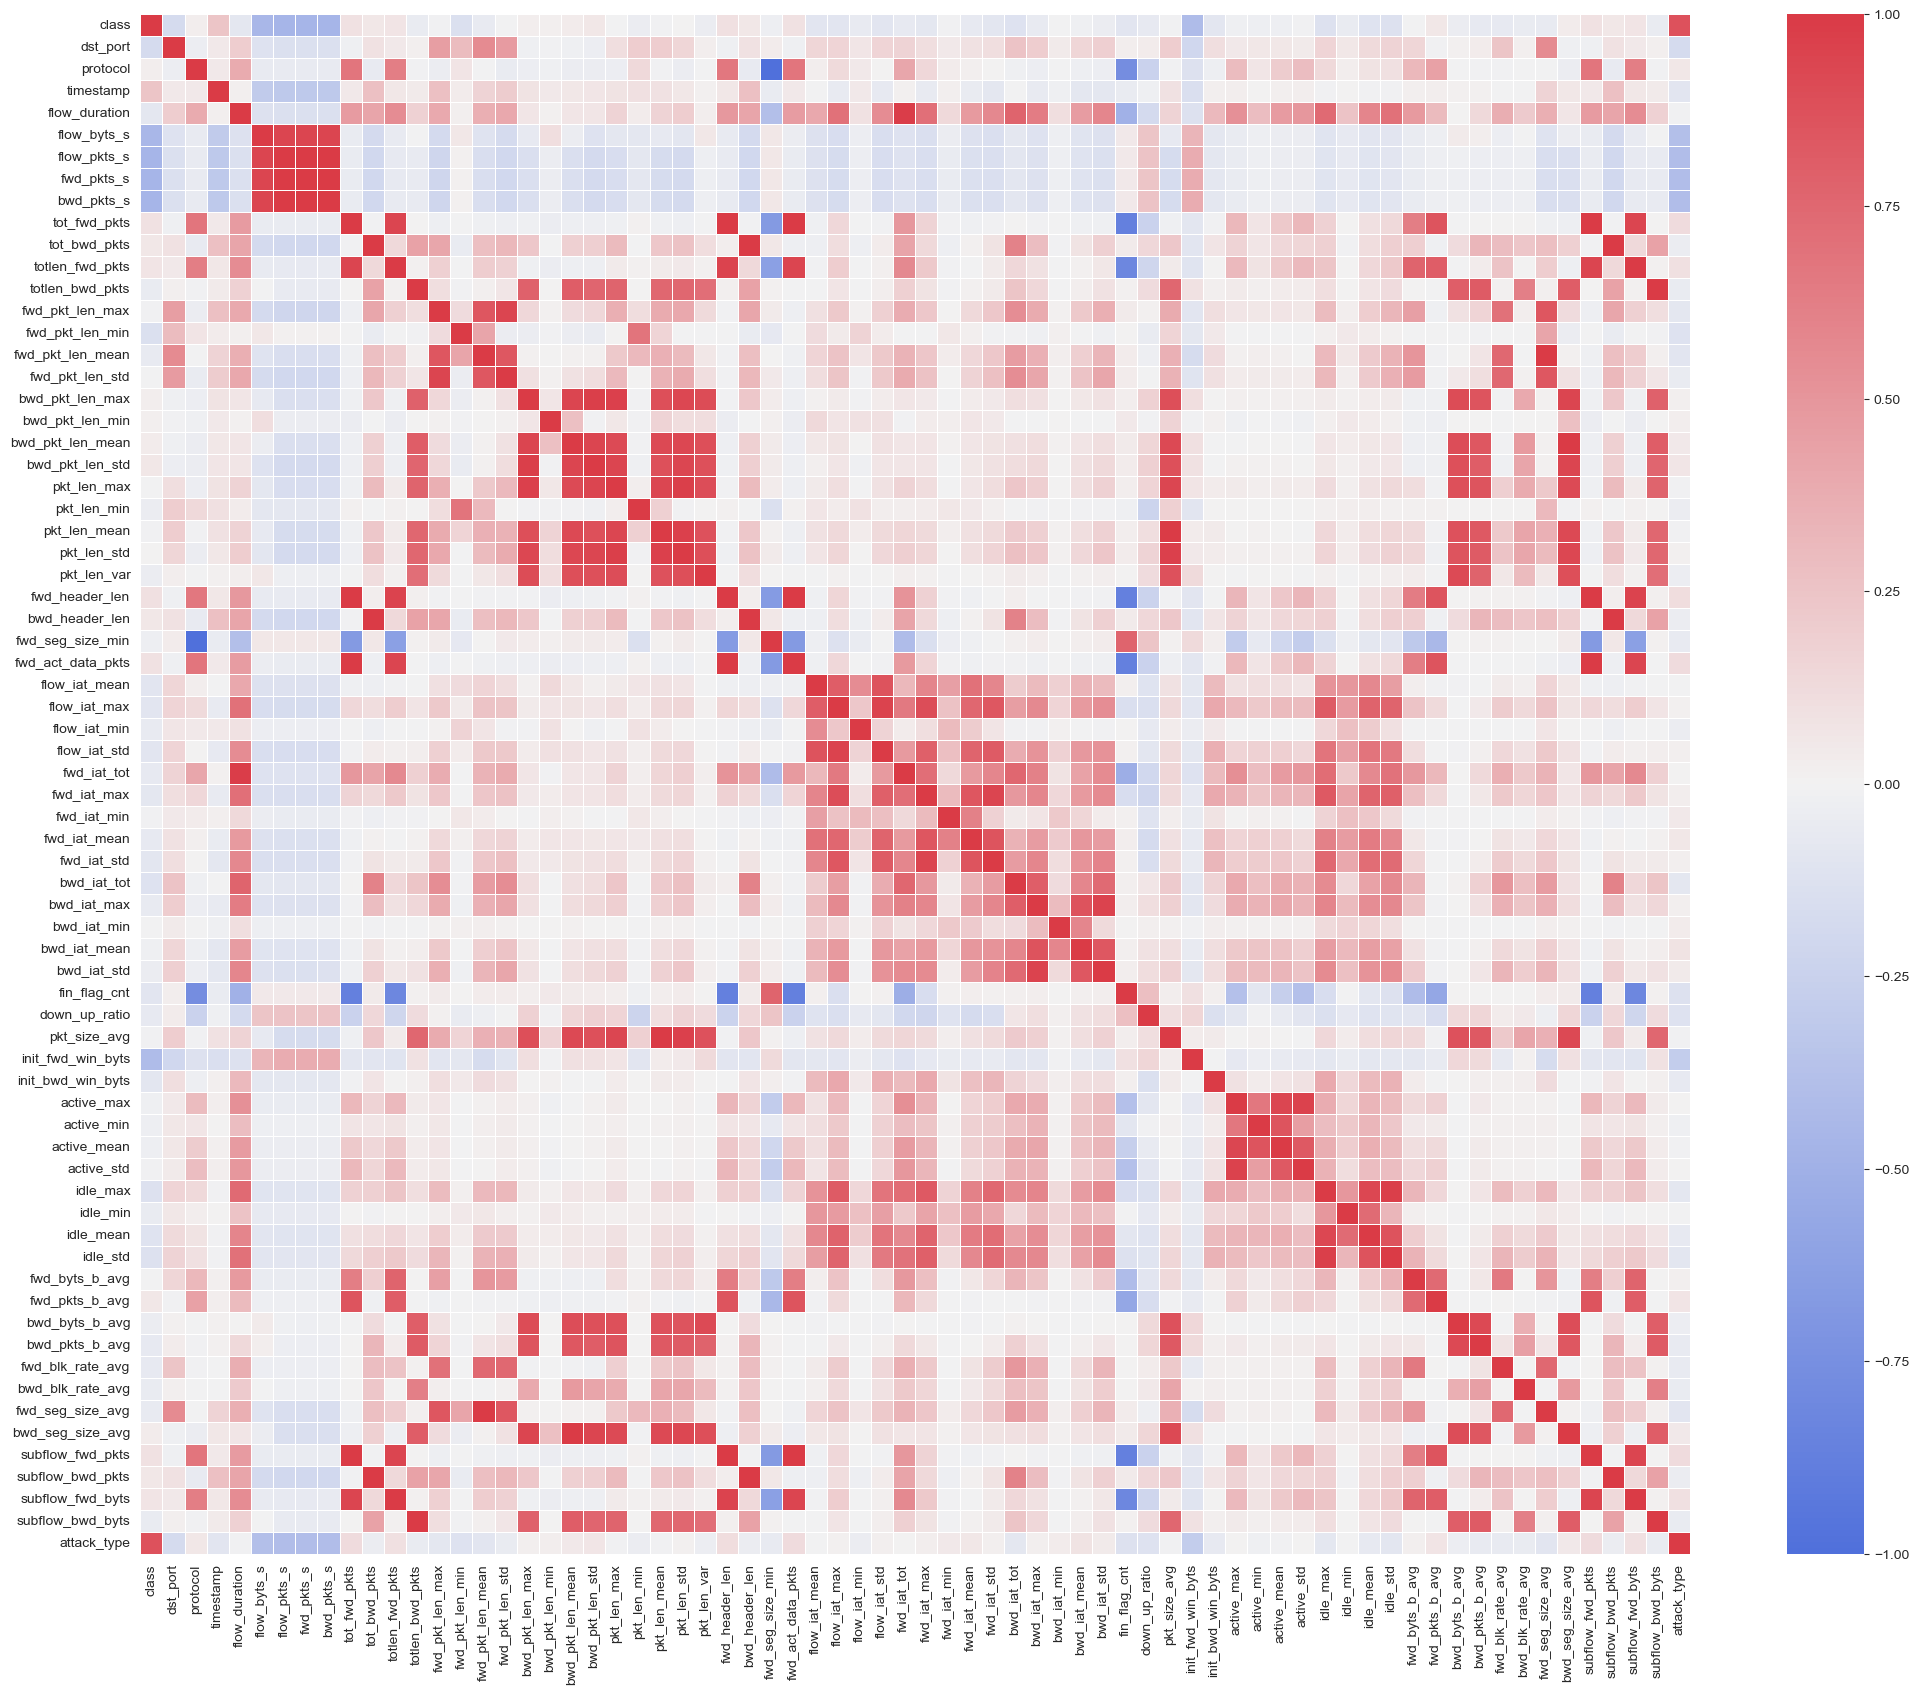

In [23]:
corr = df.drop('cpu', axis=1).corr()
plt.figure(figsize=(25, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))
print(corr.shape)

[[2.00000000e+00 2.80000000e+01 7.32747196e-15 2.00000000e+00]
 [1.50000000e+01 6.30000000e+01 0.00000000e+00 2.00000000e+00]
 [1.10000000e+01 6.70000000e+01 0.00000000e+00 2.00000000e+00]
 [9.00000000e+00 6.50000000e+01 0.00000000e+00 2.00000000e+00]
 [1.00000000e+01 6.60000000e+01 0.00000000e+00 2.00000000e+00]
 [1.20000000e+01 6.80000000e+01 0.00000000e+00 2.00000000e+00]
 [1.90000000e+01 6.40000000e+01 0.00000000e+00 2.00000000e+00]
 [2.30000000e+01 4.60000000e+01 0.00000000e+00 2.00000000e+00]
 [2.70000000e+01 7.40000000e+01 5.03499792e-06 3.00000000e+00]
 [2.90000000e+01 7.30000000e+01 1.53979921e-04 3.00000000e+00]
 [6.00000000e+00 7.00000000e+00 4.18273351e-04 2.00000000e+00]
 [8.00000000e+00 8.00000000e+01 1.67362437e-03 3.00000000e+00]
 [2.60000000e+01 7.90000000e+01 1.77160564e-03 4.00000000e+00]
 [4.00000000e+00 3.40000000e+01 1.56437521e-02 2.00000000e+00]
 [1.70000000e+01 2.00000000e+01 2.62143964e-02 2.00000000e+00]
 [2.10000000e+01 2.40000000e+01 2.83822673e-02 2.000000

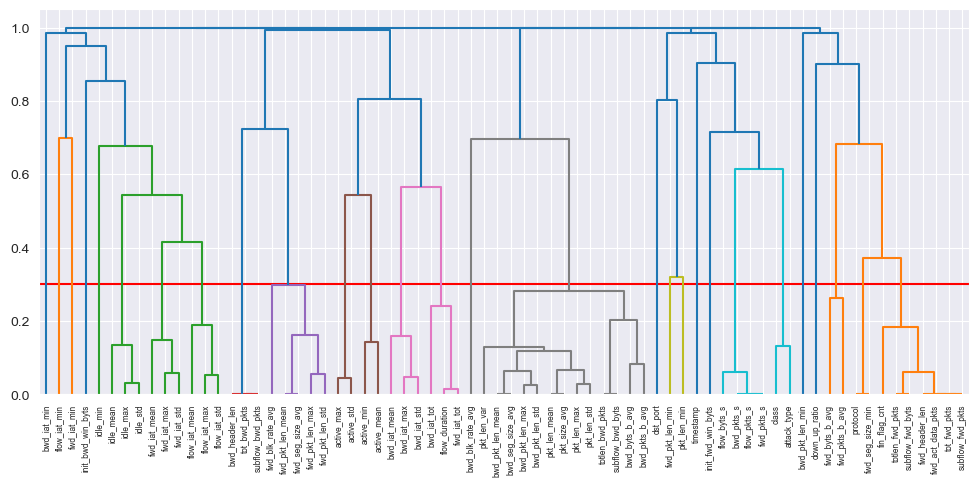

In [24]:
plt.figure(figsize=(12,5))
dissimilarity = 1-abs(corr)
Z = linkage(squareform(dissimilarity), 'complete')
print(abs(Z))
plt.axhline(y=.3, c="red")
dendrogram(abs(Z), labels=corr.columns, orientation='top',
           leaf_rotation=90)
plt.show()

In [ ]:
# df_corr= corr_df
# # df_corr= df_corr.get(["class", "flow_duration"])
# df_corr= df_corr.drop(["flow_byts_s", "totlen_fwd_pkts"], axis=1)
# df_corr= df_corr.drop(['flow_iat_mean', 'flow_iat_std', 'flow_iat_mean', 'fwd_pkts_b_avg', 'fwd_byts_b_avg', 'subflow_bwd_pkts', 'tot_bwd_pkts', 'fwd_pkts_s', 'bwd_byts_b_avg', 'bwd_blk_rate_avg', 'bwd_pkts_s', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_header_len', 'flow_pkts_s', 'fwd_pkt_len_mean', 'fwd_seg_size_avg', 'fwd_pkt_len_std', 'pkt_len_max', 'pkt_len_mean', 'pkt_size_avg', 'pkt_len_std', 'pkt_len_var', 'flow_byts_s', 'totlen_bwd_pkts', 'flow_iat_max', 'idle_max', 'fwd_pkt_len_min', 'nb_flows', 'active_mean', 'active_max', 'active_std', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_pkt_len_std', 'bwd_seg_size_avg', 'bwd_pkt_len_mean', 'bwd_pkt_len_max', 'fwd_seg_size_min', 'down_up_ratio', 'bwd_iat_tot', 'init_bwd_win_byts', 'bwd_iat_mean', 'bwd_iat_max', 'fwd_iat_min', 'nb_ports', 'init_fwd_win_byts', 'bwd_iat_min', 'tot_fwd_pkts', 'subflow_bwd_byts', 'totlen_fwd_pkts', 'subflow_fwd_pkts', 'subflow_fwd_byts'], axis=1)

In [ ]:
# r1 = df_corr.corr(method='spearman')
# sns.heatmap(r1, vmin=-1, vmax=1)

In [ ]:
# r1 = df_corr.corr(method='spearman')
# plt.figure(figsize=(12, 5))
# dissimilarity = 1 - abs(r1)
# Z = linkage(squareform(dissimilarity), 'complete')
# plt.axhline(y=.3, c="red")
# dendrogram(Z, labels=df_corr.columns, orientation='top',
#            leaf_rotation=90);

In [ ]:
# import numpy as np
# def discretize_by_median(data, column, median_value, margin=0.0):
#     # Define the margin around the median
#     lower_bound = median_value - margin
#     upper_bound = median_value + margin
#
#     # Filter out points around the median
#     filtered_data = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
#
#     # Discretize the filtered data
#     filtered_data[column + '_discretized'] = pd.cut(filtered_data[column],
#                                                     bins=[filtered_data[column].min(), median_value, filtered_data[column].max()],
#                                                     labels=[0, 1])
#     return filtered_data
#
# print(np.median(df['cpu_total']))
# df= discretize_by_median(df, 'cpu_total', np.median(df['cpu_total']) )
# df[df['cpu_total_discretized']==0]

In [25]:
# X= df.drop(['flow_iat_mean', 'flow_iat_std', 'flow_iat_mean', 'fwd_pkts_b_avg', 'fwd_byts_b_avg', 'subflow_bwd_pkts', 'tot_bwd_pkts', 'fwd_pkts_s', 'bwd_byts_b_avg', 'bwd_blk_rate_avg', 'bwd_pkts_s', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_header_len', 'flow_pkts_s', 'fwd_pkt_len_mean', 'fwd_seg_size_avg', 'fwd_pkt_len_std', 'pkt_len_max', 'pkt_len_mean', 'pkt_size_avg', 'pkt_len_std', 'pkt_len_var', 'flow_byts_s', 'totlen_bwd_pkts', 'flow_iat_max', 'idle_max', 'fwd_pkt_len_min', 'nb_flows', 'active_mean', 'active_max', 'active_std', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_pkt_len_std', 'bwd_seg_size_avg', 'bwd_pkt_len_mean', 'bwd_pkt_len_max', 'fwd_seg_size_min', 'down_up_ratio', 'bwd_iat_tot', 'init_bwd_win_byts', 'bwd_iat_mean', 'bwd_iat_max', 'fwd_iat_min', 'nb_ports', 'init_fwd_win_byts', 'bwd_iat_min', 'tot_fwd_pkts', 'subflow_bwd_byts', 'totlen_fwd_pkts', 'subflow_fwd_pkts', 'subflow_fwd_byts', 'classifier', 'classifier_discretized'], axis=1)
# X= df.drop(['cpu_total_discretized','cpu_total'], axis=1)
# test_df = df.sample(n=100)
X= df.get(["flow_duration", "class", "attack_type", "flow_pkts_s", "tot_fwd_pkts"])
Y= df['cpu']

PyALE._ALE_generic:INFO: Continuous feature detected.


Index(['flow_duration', 'class', 'attack_type', 'flow_pkts_s', 'tot_fwd_pkts'], dtype='object')


PyALE._ALE_generic:INFO: Discrete feature detected.
PyALE._ALE_generic:INFO: Discrete feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


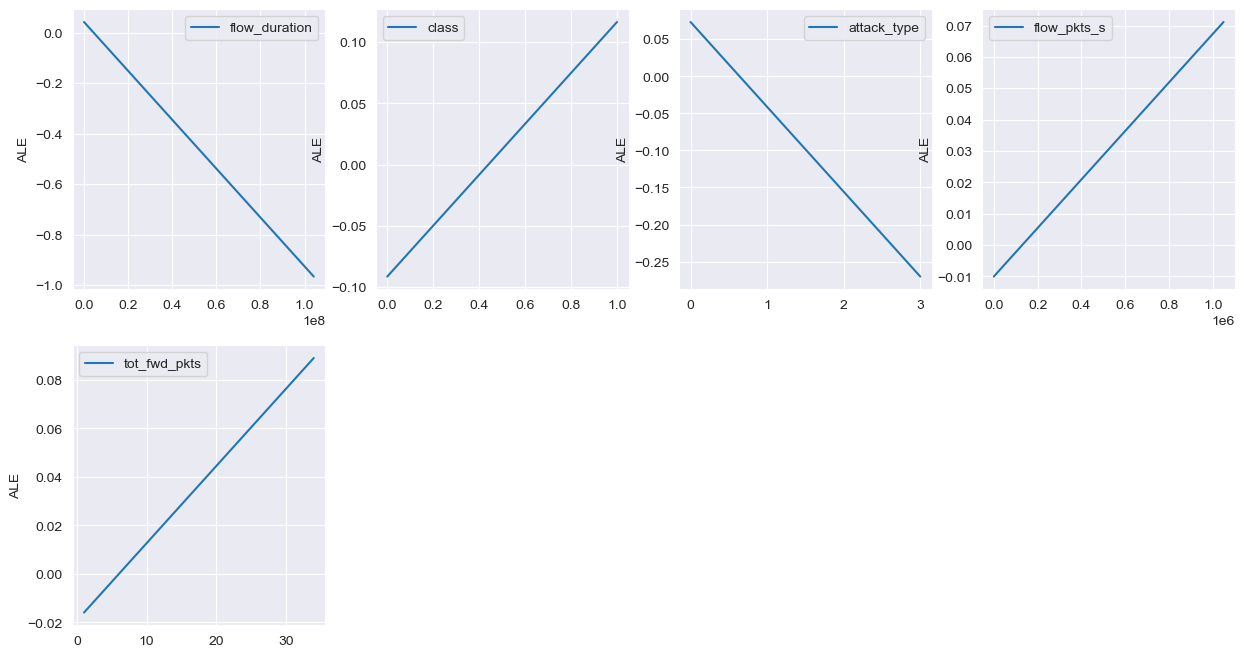

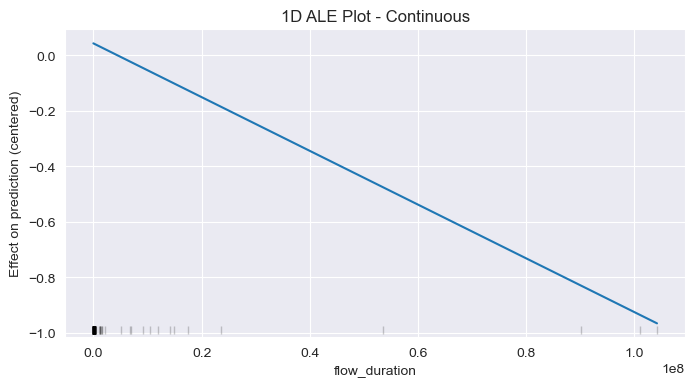

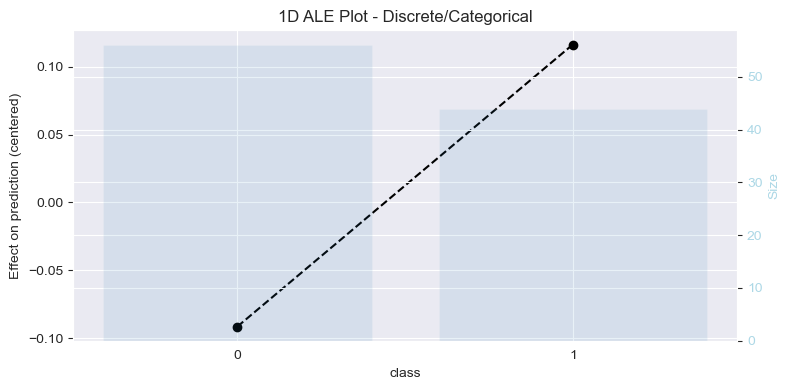

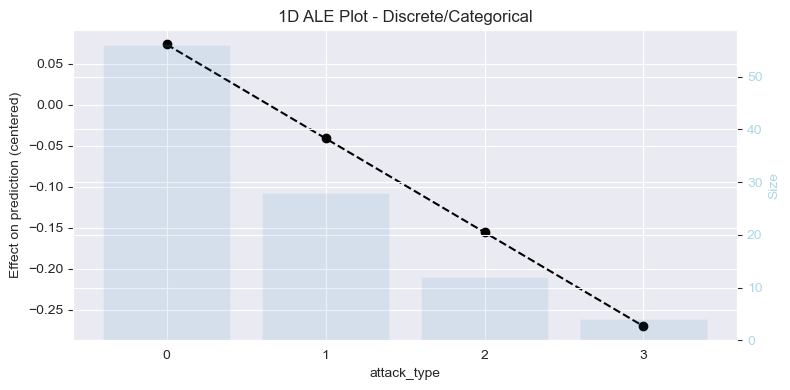

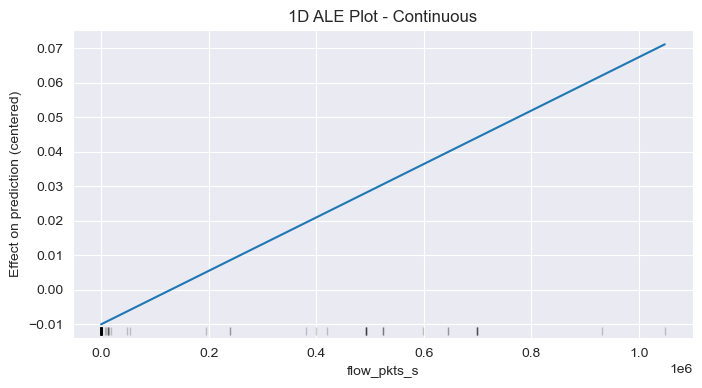

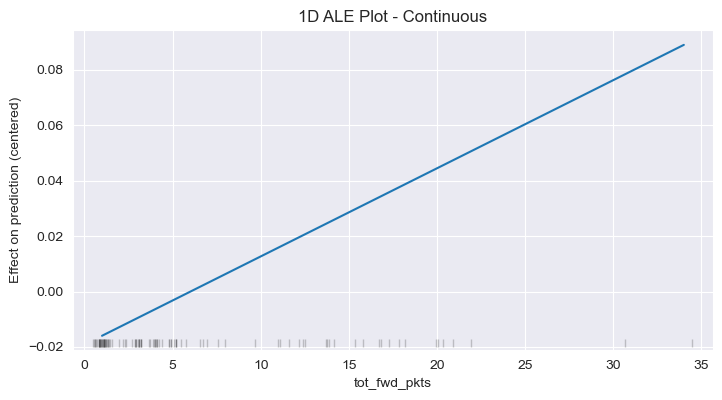

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from PyALE import ale
import math

model = LinearRegression()
Y = np.nan_to_num(Y, nan=0)
model = model.fit(X, Y)
feature_list = X.columns
print(feature_list)

# Define the number of rows and columns for your subplot grid
num_cols = 4
num_rows = math.ceil(len(feature_list) / num_cols)

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Loop over each feature and plot its impact
for i, feature in enumerate(feature_list):
    row = i // num_cols
    col = i % num_cols

    ale_eff = ale(X=X, model=model, feature=[feature], grid_size=50, include_CI=False)

    # Plot the ALE plot for the current feature
    axes[row, col].plot(ale_eff['eff'], label=feature)
    axes[row, col].set_ylabel("ALE")
    axes[row, col].legend()

# Hide any empty subplots
for j in range(len(feature_list), num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()


In [ ]:
# Scatter plot
plt.scatter(df["attack_type"], df["cpu_total"])

# Adding labels and title
plt.xlabel('Malicious flows')
plt.ylabel('CPU usage')
plt.title('Scatter Plot of malicious flows and cpu usage')

# Display the plot
plt.show()